In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

np.random.seed(123)

In [2]:
VAR_DIM = 4*(4*2+1)
T = 200

init = np.random.normal(loc=0., scale=0.2, size=[2,4])
data = [init[0], init[1]]
coefs = [np.random.normal(loc=0., scale=0.1, size=[VAR_DIM])]

def coef_noise():
    csigmas = np.array([0.01,0.015,0.08,0.01])
    create_ind = lambda: np.diag(np.random.normal(loc=0, scale=1., size=[4])*csigmas).reshape((-1,))
    first = create_ind()
    second = create_ind()
    const = np.random.normal(loc=0, scale=0.01, size=4)
    noise = np.concatenate([first, second, const])
    return noise

def step(coefs, data):
    coefs = coefs[:16], coefs[16:32], coefs[32:]
    coefs = np.reshape(coefs[0], [4,4]), np.reshape(coefs[1], [4,4]), np.reshape(coefs[2], [4,1])
    prev = data[-1].reshape((4,1))
    pprev = data[-2].reshape((4,1))
    new = np.matmul(coefs[0], prev) + np.matmul(coefs[1], pprev) + coefs[-1] + np.random.normal(scale=0.05, size=[4,1])
    return new[:,0]
    
for t in range(T):
    ccoefs = coefs[-1]
    new = step(ccoefs, data)
    data.append(new)
    new_coefs = coef_noise()  + ccoefs
    coefs.append(new_coefs)

In [3]:
data = np.array(data)
coefs = np.array(coefs)

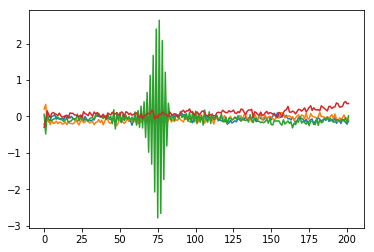

In [4]:
plt.plot(data)
plt.show()

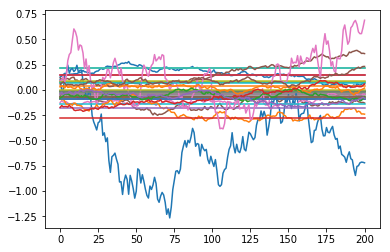

In [5]:
plt.plot(coefs)
plt.show()

In [6]:
data.shape

(202, 4)

In [7]:
data = pd.DataFrame(data.T)

In [8]:
data['VARIABLE'] = ['V{}'.format(i) for i in range(4)]

In [9]:
data

,0,1,2,3,4,5,6,7,8,9,...,193,194,195,196,197,198,199,200,201,VARIABLE
0,-0.217126,-0.115720,-0.010445,-0.150767,-0.090983,-0.005000,0.015068,0.046627,-0.074096,-0.046367,...,-0.189198,-0.130615,-0.118363,-0.194288,-0.076371,-0.105081,-0.163135,-0.214137,-0.126238,V0
1,0.199469,0.330287,-0.117730,-0.119435,-0.226201,-0.103019,-0.193965,-0.179966,-0.130239,-0.198140,...,-0.069844,-0.147885,-0.039052,-0.076535,-0.036368,0.037736,-0.050657,-0.053412,-0.094341,V1
2,0.056596,-0.485336,0.110169,-0.078150,-0.122640,-0.109321,-0.075295,-0.068464,-0.006955,-0.023354,...,-0.096694,-0.092438,-0.126061,-0.088714,-0.111148,-0.124118,-0.033003,-0.186699,0.017908,V2
3,-0.301259,-0.085783,0.154207,0.051696,-0.031068,0.084466,0.106853,0.075431,0.054615,0.023713,...,0.370193,0.352501,0.256770,0.260723,0.277133,0.379124,0.411465,0.347798,0.355314,V3


In [10]:
data.to_csv('../CDATA/SYNTH.csv')

In [11]:
cnoise = []
for _ in range(10000):
    cnoise.append(coef_noise())
cnoise = np.std(cnoise, axis=0)

In [12]:
cnoise

array([0.0101639 , 0.        , 0.        , 0.        , 0.        ,
       0.01489627, 0.        , 0.        , 0.        , 0.        ,
       0.07989248, 0.        , 0.        , 0.        , 0.        ,
       0.01004316, 0.01000279, 0.        , 0.        , 0.        ,
       0.        , 0.0149179 , 0.        , 0.        , 0.        ,
       0.        , 0.07997657, 0.        , 0.        , 0.        ,
       0.        , 0.00987311, 0.00996246, 0.00990312, 0.00997926,
       0.01005677])